In [52]:

from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.color import rgb2gray,rgb2hsv
from skimage.filters import threshold_otsu, rank
from skimage.morphology import disk
from skimage.filters import gaussian
from skimage.filters import median
from skimage import data
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
import matplotlib
import matplotlib.pyplot as plt
import cv2
from cv2 import threshold 
from collections import Counter 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


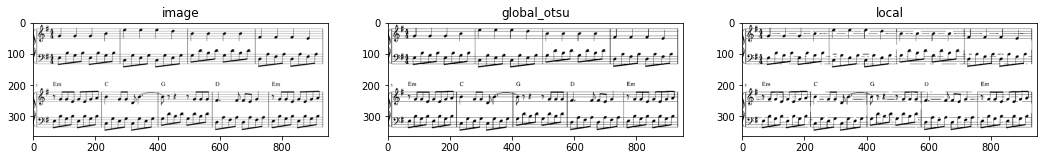

In [53]:

img = io.imread('2.png', as_gray=True)
imgg = img_as_ubyte(image)


radius = 15
selem = disk(radius)

local_otsu = rank.otsu(imgg, selem)
threshold_global_otsu = threshold_otsu(imgg)
global_otsu = imgg >= threshold_global_otsu

i=imgg >= local_otsu
show_images([image,global_otsu, i],['image','global_otsu','local'])


<ipython-input-54-c416ac44c1e1>:46: UserWarning: otsu-global.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('otsu-global.png', binary_img)


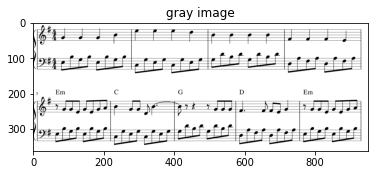

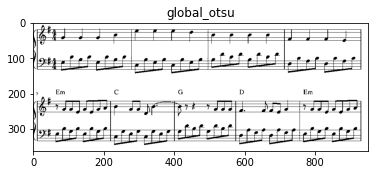

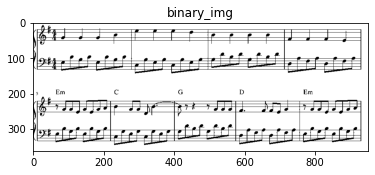

<ipython-input-54-c416ac44c1e1>:54: UserWarning: global-otsu-built-in.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('global-otsu-built-in.png', global_otsu)
<ipython-input-54-c416ac44c1e1>:55: UserWarning: otsu-local.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('otsu-local.png', binary_img)


In [54]:
def calcThreshold (s,e,H,H_c):
    sumLevels = 0
    for x in range (s,e+1):
        sumLevels = sumLevels + (x*H[x])
        
    if (s == 0):
        T = round(sumLevels/H_c[e]) 
    else:
        T = round(sumLevels/(H_c[e]-H_c[s-1]))  
    return T


def  getThreshold(img):
    if ((img <= 1).all()):
        img = img * 255
    img = img.astype('uint8')
    
    H = np.zeros(265);
    H_c = np.zeros(265);
    binary_img = np.ones(img.shape)
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            H[img[x][y]] += 1;
            
    H_c[0] = H[0];
    for x in range (1,256):
        H_c[x] = H_c[x-1] + H[x];
            
    Tinit = calcThreshold(0,255,H,H_c)
    Tavg1 = 0
    Tavg2 = Tinit
    while (Tavg1 != Tavg2):
        Tavg1 = Tavg2
        T1 = calcThreshold(0,int(Tavg2),H,H_c)
        T2 = calcThreshold(int(Tavg2)+1,255,H,H_c)
        Tavg2 = (T1+T2)/2
    
    binary_img = img >= Tavg2
    return binary_img
    
    

img = io.imread('2.png', as_gray = True)
binary_img = getThreshold(img) 
io.imsave('otsu-global.png', binary_img)
binary_img[0:HL, 0:HW] = getThreshold(img[0:HL, 0:HW])
binary_img[0:HL, HW:W] = getThreshold(img[0:HL, HW:W])
binary_img[HL:L, 0:HW] = getThreshold(img[HL:L, 0:HW])
binary_img[HL:L, HW:W] = getThreshold(img[HL:L, HW:W])
show_images([img],['gray image'])
show_images([global_otsu],['global_otsu'])
show_images([binary_img],['binary_img'])
io.imsave('global-otsu-built-in.png', global_otsu)
io.imsave('otsu-local.png', binary_img)

In [59]:
rows=binary_img.shape[0]
columns=binary_img.shape[1]
white_run=[]
black_run=[]
black_and_white_run=[]
run=0
for column in range(columns):
    first_run=True
    for row in range(rows):
        if binary_img[row][column]==first_run:
            run+=1
        else:
            black_and_white_run.append(run)
            if(first_run==True):
                white_run.append(run)
            else:
                black_run.append(run)
            first_run=binary_img[row][column]
            run=1
black_and_white_run.append(run)
if(first_run==True):
    white_run.append(run)
else:
    black_run.append(run)
sum_white_and_black_runs = [sum(black_and_white_run[i:i+2]) for i in range(0, len(black_and_white_run), 2)]
counter_white=Counter(white_run)
counter_black=Counter(black_run)
counter_white_black=Counter(sum_white_and_black_runs)

staffline_thickness=counter_black.most_common(1)[0][0]
staffline_spacing=counter_white.most_common(1)[0][0]
width_spacing=counter_white_black.most_common(1)[0][0]

print(staffline_thickness+staffline_spacing==width_spacing)

True
